# All_Cancer_Rates_US_Counties_2017-2021 _ CODING

In [26]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file for All Cancer data
all_cancer_df = pd.read_csv('./Source_Data/All_Cancer_Rates_US_Counties_2017-2021.csv')

# Display the first few rows of the data
all_cancer_df.head()

,County,FIPS,2023 Rural-Urban Continuum Codes([rural urban note]),"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,US (SEER+NPCR)(1),0.0,NaN,444.4,444.1,444.7,N/A,N/A,N/A,1744459,falling,-0.5,-0.7,-0.3
1,"Union County, Florida(6)",12125.0,Rural,1248.4,1177.5,1322.7,N/A,N/A,N/A,245,stable,0.4,-0.6,1.5
2,"Traverse County, Minnesota(6)",27155.0,Rural,693.5,588.2,814.3,N/A,N/A,N/A,37,stable,2.2,-0.9,5.5
3,"Polk County, Texas(7)",48373.0,Rural,679.5,648.4,711.8,N/A,N/A,N/A,436,stable,-0.3,-3.1,2.5
4,"Galax City, Virginia(6)",51640.0,Rural,655,577.7,740.2,N/A,N/A,N/A,55,stable,1.7,-0.7,4


# Data Cleaning 

In [34]:
# Keep only 'County', 'FIPS', and 'Average Annual Count' columns
all_cancer_cleaned = all_cancer_df[['County', 'FIPS', 'Average Annual Count']]

# Split 'County' into 'County' and 'State'
all_cancer_cleaned[['County', 'State']] = all_cancer_cleaned['County'].str.split(', ', n=1, expand=True)

# Fill missing 'State' values with 'Unknown'
all_cancer_cleaned['State'].fillna('Unknown', inplace=True)

# Convert FIPS column to numeric, coercing errors to NaN, then dropping NaN values
all_cancer_cleaned['FIPS'] = pd.to_numeric(all_cancer_cleaned['FIPS'], errors='coerce')
all_cancer_cleaned.dropna(subset=['FIPS'], inplace=True)

# Convert 'Average Annual Count' to numeric, coercing errors to NaN
all_cancer_cleaned['Average Annual Count'] = pd.to_numeric(all_cancer_cleaned['Average Annual Count'], errors='coerce')

# Remove non-county data (rows like "US", "Puerto Rico", etc.)
exclude_list = ['US', 'Puerto Rico', '(1)', '(6)']
all_cancer_cleaned = all_cancer_cleaned[~all_cancer_cleaned['County'].str.contains('|'.join(exclude_list))]

# Filter out rows with missing or zero 'Average Annual Count'
all_cancer_cleaned = all_cancer_cleaned[all_cancer_cleaned['Average Annual Count'] > 0]

# Save the cleaned data to a new CSV file
cleaned_file_path = 'cleaned_all_cancer_data.csv'
all_cancer_cleaned.to_csv(cleaned_file_path, index=False)

# Display the cleaned data
all_cancer_cleaned.head(), cleaned_file_path

all_cancer_cleaned.head()

C:\Users\ayafa\AppData\Local\Temp\ipykernel_6828\3606120282.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_cancer_cleaned[['County', 'State']] = all_cancer_cleaned['County'].str.split(', ', n=1, expand=True)
C:\Users\ayafa\AppData\Local\Temp\ipykernel_6828\3606120282.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_cancer_cleaned[['County', 'State']] = all_cancer_cleaned['County'].str.split(', ', n=1, expand=True)
C:\Users\ayafa\AppData\Local\Temp\ipykernel_6828\3606120282.py:8: FutureWarnin

,County,FIPS,Average Annual Count,State
1,Union County,12125.0,245.0,Florida(6)
2,Traverse County,27155.0,37.0,Minnesota(6)
3,Polk County,48373.0,436.0,Texas(7)
4,Galax City,51640.0,55.0,Virginia(6)
5,Greeley County,31077.0,21.0,Nebraska(6)


# Code for Visualization

C:\Users\ayafa\AppData\Local\Temp\ipykernel_6828\3883129821.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='County', x='Average Annual Count', data=county_all_cancer.head(30), palette='magma')


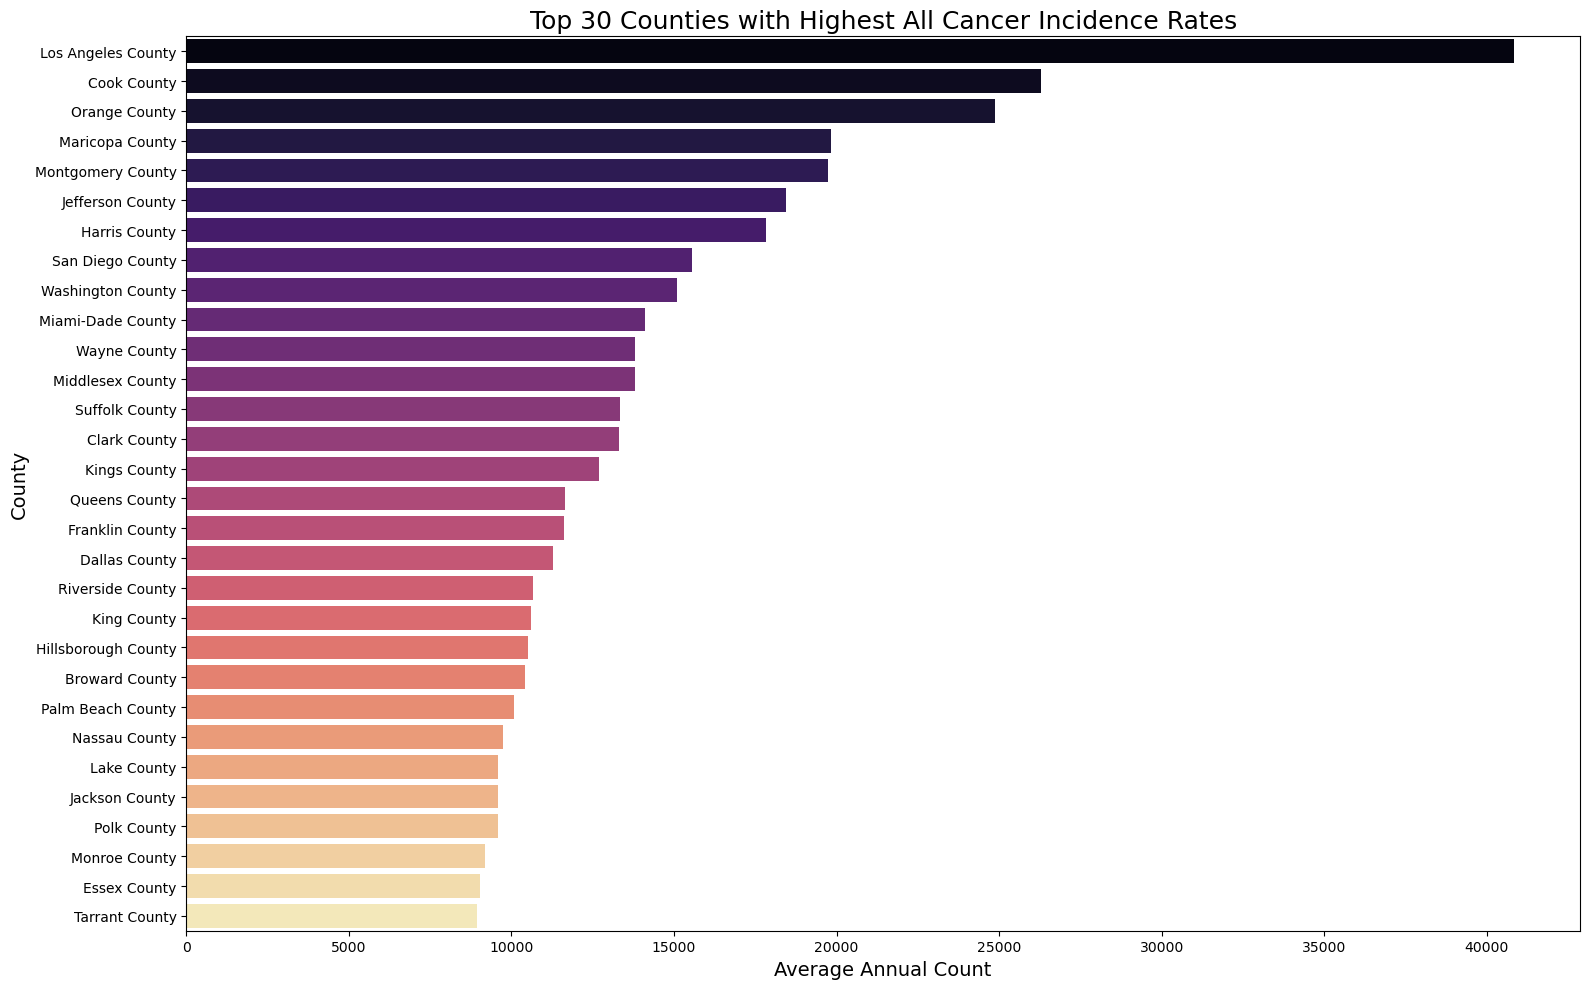

In [30]:


# Aggregate data by county
county_all_cancer = all_cancer_cleaned.groupby('County')['Average Annual Count'].sum().reset_index()

# Sort the data by cancer incidence
county_all_cancer = county_all_cancer.sort_values(by='Average Annual Count', ascending=False)

# Set the figure size
plt.figure(figsize=(16, 10))

# Create a horizontal bar chart using Seaborn
sns.barplot(y='County', x='Average Annual Count', data=county_all_cancer.head(30), palette='magma')

# Set chart title and labels
plt.title('Top 30 Counties with Highest All Cancer Incidence Rates', fontsize=18)
plt.xlabel('Average Annual Count', fontsize=14)
plt.ylabel('County', fontsize=14)

# Use tight layout for better spacing
plt.tight_layout()

# Display the chart
plt.show()